In [1]:
import torch
from torch import nn, tensor, optim
from torch.optim import Optimizer
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [2]:
def createData(x,border = 5,noisedsamples=1):
    y=torch.zeros(x.shape).float()
    mask = x>=border
    indices = np.random.choice(x.shape[0],noisedsamples,replace=False)
    mask[indices]=~mask[indices]
    y[mask]=1.0
    c=["r" if y_==1 else "b" for y_ in y]
    return y,c

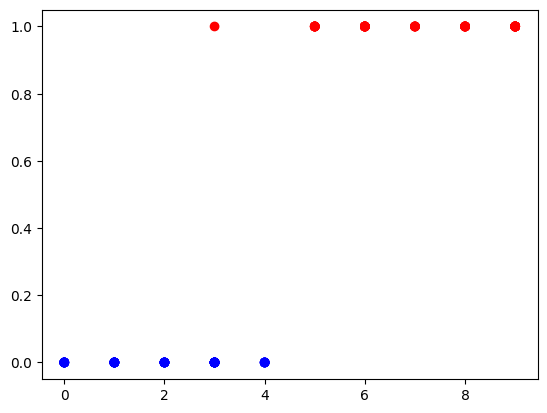

In [3]:
torch.manual_seed(0)
x=torch.randint(0,10,(100,1)).float()
y,c=createData(x)
plt.scatter(x,y,c=c)
plt.show()

In [4]:
def createnet():
    net = nn.Sequential(
        nn.Linear(1, 1),
        nn.Sigmoid(),
    )
    for param in net.parameters():
        if hasattr(param,"reset_parameters"):
            torch.manual_seed(0)
            param.reset_parameters()
            
    return net
def createoptim(net:nn.Module):
    return optim.SGD(net.parameters(), lr=0.01)

In [5]:
net1 = createnet()
net2 = createnet()
net3 = createnet()
net4 = createnet()

optim1 = createoptim(net1)
optim2 = createoptim(net2)
optim3 = createoptim(net3)
optim4 = createoptim(net4)

loss_fun = nn.BCELoss()

def print_params(net):
    for name,param in net.named_parameters():
        print(name,param)
def l2reg(net: nn.Module, bias=False):
    # regPenalty=tensor(0.0,requires_grad=True)
    regPenalty = 0
    for name, param in net.named_parameters():
        if not bias and name.endswith("weight"):
            regPenalty += (param.data**2).sum()
        elif bias:
            regPenalty += (param.data**2).sum()
    return regPenalty


def train(
    net: nn.Module,
    optim: Optimizer,
    regbias: bool | None = None,
    donttrain=False,
    numepochs=10,
):
    losses = np.zeros(numepochs)
    net.train()
    for i in range(numepochs):
        y_hat = net(x)
        loss = loss_fun(y_hat, y)
        losses[i] = loss.item()
        if not donttrain:
            optim.zero_grad(True)
            if regbias is not None:
                regPenalty = l2reg(net, regbias)
                loss += regPenalty
            loss.backward()
            optim.step()
        print_params(net)
    return losses

no reg
0.weight Parameter containing:
tensor([[0.9319]], requires_grad=True)
0.bias Parameter containing:
tensor([0.6696], requires_grad=True)
0.weight Parameter containing:
tensor([[0.9232]], requires_grad=True)
0.bias Parameter containing:
tensor([0.6654], requires_grad=True)
0.weight Parameter containing:
tensor([[0.9144]], requires_grad=True)
0.bias Parameter containing:
tensor([0.6612], requires_grad=True)
0.weight Parameter containing:
tensor([[0.9056]], requires_grad=True)
0.bias Parameter containing:
tensor([0.6571], requires_grad=True)
0.weight Parameter containing:
tensor([[0.8968]], requires_grad=True)
0.bias Parameter containing:
tensor([0.6529], requires_grad=True)
0.weight Parameter containing:
tensor([[0.8881]], requires_grad=True)
0.bias Parameter containing:
tensor([0.6487], requires_grad=True)
0.weight Parameter containing:
tensor([[0.8794]], requires_grad=True)
0.bias Parameter containing:
tensor([0.6446], requires_grad=True)
0.weight Parameter containing:
tensor([[0

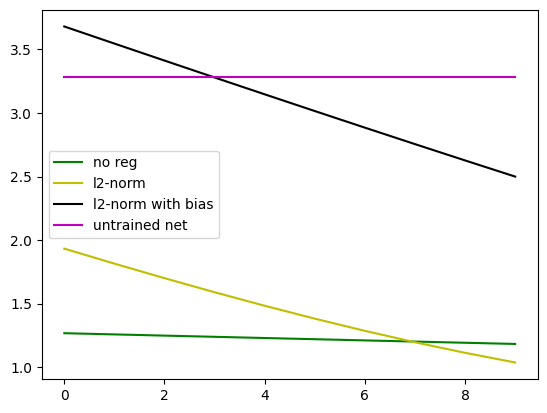

In [6]:
names_list=["datapts","no reg","l2-norm","l2-norm with bias","untrained net"]

print(names_list[1])
losses1=train(net1,optim1)
print(names_list[2])
losses2=train(net2,optim2,False)
print(names_list[3])
losses3=train(net3,optim3,True)
print(names_list[4])
losses4=train(net4,optim4,None,True)
plt.plot(losses1,c="g")
plt.plot(losses2,c="y")
plt.plot(losses3,c="k")
plt.plot(losses4,c="m")
plt.legend(names_list[1:])
plt.show()

In [7]:
def plotScatter(x,y,c,x_range=None, multiplier=100):
    if x_range is None:
        x_range = x
    y*=multiplier
    net1.eval()
    net2.eval()
    net3.eval()
    net4.eval()
    y1 = net1(x_range)*multiplier
    y2 = net2(x_range)*multiplier
    y3 = net3(x_range)*multiplier
    y4 = net4(x_range)*multiplier
    plt.scatter(x,y,c=c)
    plt.plot(x_range,y1.detach(),c="g")
    plt.plot(x_range,y2.detach(),c="y")
    plt.plot(x_range,y3.detach(),c="k")
    plt.plot(x_range,y4.detach(),c="m")
    plt.legend(names_list)
    plt.show()

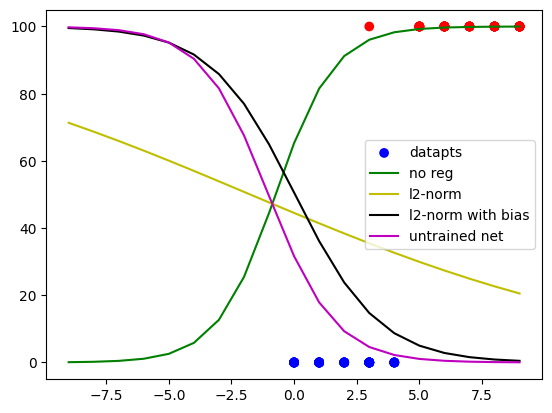

In [8]:
plotScatter(x,y,c,torch.vstack((-x.unique()[:,None].flip(0),x.unique()[:,None][1:])))

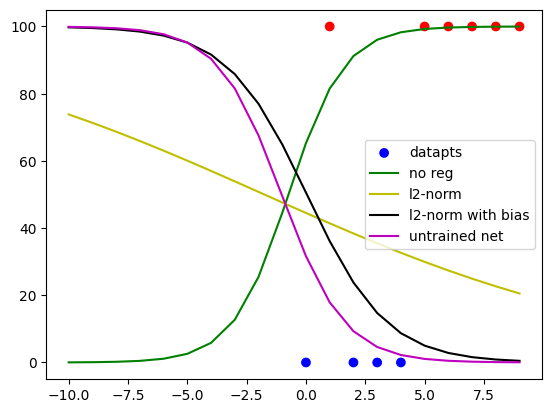

In [9]:
torch.manual_seed(1)
test_length = 10
xtest=torch.arange(test_length).reshape((test_length,1)).float()
ytest,ctest=createData(xtest)
plotScatter(xtest,ytest,ctest,torch.arange(-test_length, test_length).reshape((2*test_length,1)).float())

End

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [ ]:
w = np.linspace()

In [ ]:
np.random.seed(0)
eigvec = scipy.linalg.orth(np.random.randint(-10,10,(2,2)))

In [ ]:
np.random.seed(0)
eigval = np.diag(np.random.randint(1,10,2))

In [ ]:
A = eigvec @ eigval @ eigvec.T
np.random.seed(1)
b = np.random.randint(-10,10,2)
np.random.seed(42)
c = np.random.randint(-10,10)
A,b,c

In [ ]:
eigvec

In [ ]:
eigval.diagonal()

In [ ]:
eigvec * eigval.diagonal()[:,None]

In [ ]:
eigvec[0] * eigval[0,0]

In [ ]:
eigvec[1] * eigval[1,1]

In [ ]:
center = -.5*np.linalg.inv(A) @ b
margin = 20
precision = 100
x = np.linspace(center-margin,center+margin,precision)
y = np.linspace(center-margin,center+margin,precision)
X,Y = np.meshgrid(x,y)

In [ ]:
def f(x):
    return (x * (A @ x)).sum(axis=0) + x.T @ b + c

In [ ]:
stacked = np.stack((X,Y))
flattened = stacked.reshape((2,stacked.size//2))
Z=f(flattened).reshape(X.shape)

In [ ]:
plt.contour(X,Y,Z)
plt.scatter(center[0],center[1],c="r")
arrows = eigvec 
plt.arrow(center[0],center[1],arrows[0,0],arrows[0,1],color="y")
plt.arrow(center[0],center[1],arrows[1,0],arrows[1,1],color="r")
plt.show()

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

def train(model, lossfun, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = lossfun(output, target)
        loss.backward()
        optimizer.step()
        print(
            "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                epoch,
                batch_idx * len(data),
                len(train_loader.dataset),
                100.0 * batch_idx / len(train_loader),
                loss.item(),
            )
        )


def test(model, lossfun, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += lossfun(output, target).item()  # sum up batch loss
            pred = output.argmax(
                dim=1, keepdim=True
            )  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(
        "\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss,
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )


def train_models(save_models=True):
    # Training settings
    use_cuda = torch.cuda.is_available()
    use_mps = torch.backends.mps.is_available()

    torch.manual_seed(0)

    if use_cuda:
        device = torch.device("cuda")
    elif use_mps:
        device = torch.device("mps")
    else:
        device = torch.device("cpu")

    train_kwargs = {"batch_size": 15000}
    # test_kwargs = {'batch_size': 50}
    if use_cuda:
        cuda_kwargs = {"num_workers": 1, "pin_memory": True, "shuffle": True}
        train_kwargs.update(cuda_kwargs)
        # test_kwargs.update(cuda_kwargs)

    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            transforms.Lambda(lambda x: torch.flatten(x)),
        ]
    )
    dataset1 = datasets.MNIST(
        "./data_used_for_test", train=True, download=True, transform=transform
    )
    # dataset2 = datasets.MNIST('./data_used_for_test', train=False,
    #                    transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)
    # test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    model = nn.Sequential(
        nn.Dropout(0.1),
        nn.Linear(784, 30),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(30, 10),
    )

    for name,param in model.named_parameters():
        if name.endswith("weight"):
            param.data = 0.01 * torch.randn(*param.data.size())
        if name.endswith("bias"):
            param.data = 0.01 * torch.ones(*param.data.size())

    model = model.to(device)

    if save_models:
        torch.save(model, "before.pt")

    optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
    epochs = 5
    lossfun = nn.CrossEntropyLoss()
    # scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
    for epoch in range(1, epochs + 1):
        train(model, lossfun, device, train_loader, optimizer, epoch)
        # test(model, device, test_loader)
        # scheduler.step()

    if save_models:
        torch.save(model, "after_dropout.pt")

In [ ]:
def params(model):
    return np.hstack(
                [
                    param.data.cpu().numpy().flatten()
                    for name, param in model.named_parameters()
                    if name.endswith("weight")
                ]
            )

In [ ]:
train_models()

In [ ]:

def plot_distribution() -> None:
    """Plot the histograms of the weight values of the five models (before_training, no regularization,
    L1 regularization, L2 regularization and Dropout) from -1 to 1 with 100 bins.

    Returns:
        None
    """


    models = {
        "before":torch.load("before.pt"),
        "after_dropout":torch.load("after_dropout.pt"),
    }

    fig, axs = plt.subplots(figsize=(12, 6), ncols=2, sharey=True)
    axs[0].set(yscale="log", ylabel="total frequency")
    for model, ax in zip(models.keys(), axs):
        ax.set(title=model, xlabel="value")
        # START TODO ################
        # Retrieve all the weights (exclude the biases!) of the parameters for each of the five models
        # (before training, no regularization, L1 regularization, L2 regularization and Dropout)
        # and then plot the histogram as specified

        real_model = models[model]
        model_params = params(real_model)
        # normalize between -1 and 1
        model_params = (model_params - model_params.min()) / (
            model_params.max() - model_params.min()
        )

        ax.hist(model_params, bins=100)
    # END TODO ################
    fig.tight_layout()
    # save figure
    # plt.savefig("plot_dist.png")
    plt.show()

In [ ]:
plot_distribution()